# Лабораторная №1
### Набор данных -- "Уровень адаптации студентов к онлайн-образованию"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Подготовка данных

In [2]:
# ВЫВОД ДАННЫХ НА ЭКРАН
pd.set_option('display.max_columns', None)     # для отображения всех столбцов датафрейма при выводе
# загружаем данные из файла в переменную dfInit
# файл должен быть разделён запятыми и закодирован в utf-8
dfInit = pd.read_csv('./data.csv', delimiter=',', encoding='utf8')
# создаём копию датафрейма dfInit
# параметр deep для создания глубокой копии (все данные и индексы копируются, независимо от их иерархии)
df = dfInit.copy(deep=True)
# просмотр данных из датафрейма
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


### Преобразование параметров

In [3]:
# ПРЕОБРАЗОВАНИЕ ТЕКСТОВЫХ ДАННЫХ В ЧИСЛА
# gender
sexDict = { "Boy": 1, "Girl": 2 }

# age
ageDict = { "1-5": 1, "6-10": 2, "11-15": 3, "16-20": 4, "21-25": 5, "26-30": 6 }

# education level
educationDict = { "School": 1, "College": 2, "University": 3 }

# institution type
institutionDict = { "Non Government": 1, "Government": 2 }

# IT student
ITDict = { "No": 0, "Yes": 1 }

# location
locationDict = { "No": 0, "Yes": 1 }

# load-shedding
sheddingDict = { "Low": 1, "High": 2 }

# financial condition
financialDict = { "Poor": 1, "Mid": 2, "Rich": 3 }

#internet type
internetDict = { "Mobile Data": 1, "Wifi": 2 }

# network type
networkDict = { "2G": 1, "3G": 2, "4G": 3 }

# class duration
classDict = { "0": 1, "1-3": 2, "3-6": 3 }

# self lms
lmsDict = { "No": 0, "Yes": 1 }

# device
deviceDict = { "Mobile": 1, "Tab": 2, "Computer": 3 }

# adaptivity level
adaptivityDict = { "Low": 1, "Moderate": 2, "High": 3 }

In [4]:
# ПРЕОБРАЗОВАНИЕ ЗНАЧЕНИЙ В СООТВЕТСТВУЮЩИХ СТОЛБЦАХ ДАТАФРЕЙМА
# н-р, значения в столбце Gender заменяются на соответствующие значения из словаря sexDict
df['Gender'] = df['Gender'].map(lambda elem: sexDict[elem])
df['Age'] = df['Age'].map(lambda elem: ageDict[elem])
df['Education Level'] = df['Education Level'].map(lambda elem: educationDict[elem])
df['Institution Type'] = df['Institution Type'].map(lambda elem: institutionDict[elem])
df['IT Student'] = df['IT Student'].map(lambda elem: ITDict[elem])
df['Location'] = df['Location'].map(lambda elem: locationDict[elem])
df['Load-shedding'] = df['Load-shedding'].map(lambda elem: sheddingDict[elem])
df['Financial Condition'] = df['Financial Condition'].map(lambda elem: financialDict[elem])
df['Internet Type'] = df['Internet Type'].map(lambda elem: internetDict[elem])
df['Network Type'] = df['Network Type'].map(lambda elem: networkDict[elem])
df['Class Duration'] = df['Class Duration'].map(lambda elem: classDict[elem])
df['Self Lms'] = df['Self Lms'].map(lambda elem: lmsDict[elem])
df['Device'] = df['Device'].map(lambda elem: deviceDict[elem])
df['Adaptivity Level'] = df['Adaptivity Level'].map(lambda elem: adaptivityDict[elem])

In [5]:
# вывод преобразованного датафрейма
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,5,3,1,0,1,1,2,2,3,3,0,2,2
1,2,5,3,1,0,1,2,2,1,3,2,1,1,2
2,2,4,2,2,0,1,1,2,2,3,2,0,1,2
3,2,3,1,1,0,1,1,2,1,3,2,0,1,2
4,2,4,1,1,0,1,1,1,1,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2,4,2,1,0,1,1,2,2,3,2,0,1,1
1201,2,4,2,1,0,0,2,2,2,3,3,0,1,2
1202,1,3,1,1,0,1,1,2,1,2,2,0,1,2
1203,2,4,2,1,0,0,1,2,2,3,2,0,1,1


### Нормализация данных датафрейма

In [6]:
# min-max нормализация
# нужно, т.к k-means и DBSCAN основаны на измерении расстояний между точками в пространстве признаков
df_normal = (df - df.min()) / (df.max() - df.min())
df_normal

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,0.8,1.0,0.0,0.0,1.0,0.0,0.5,1.0,1.0,1.0,0.0,0.5,0.5
1,1.0,0.8,1.0,0.0,0.0,1.0,1.0,0.5,0.0,1.0,0.5,1.0,0.0,0.5
2,1.0,0.6,0.5,1.0,0.0,1.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.5
3,1.0,0.4,0.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,0.5,0.0,0.0,0.5
4,1.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,0.6,0.5,0.0,0.0,1.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0
1201,1.0,0.6,0.5,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,0.0,0.5
1202,0.0,0.4,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.5
1203,1.0,0.6,0.5,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0


<Axes: >

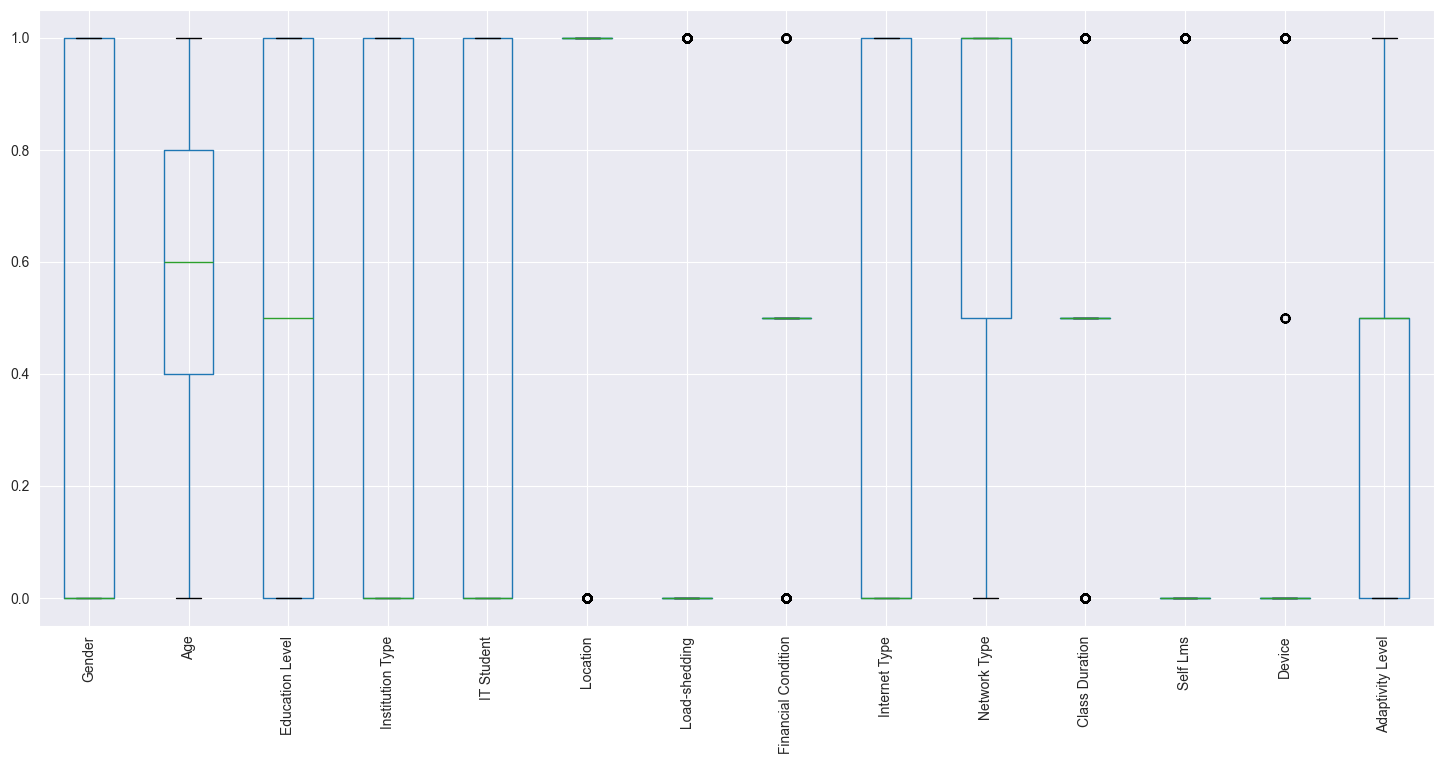

In [7]:
# СОЗДАНИЕ ЯЩИКОВОЙ ДИАГРАММЫ ДЛЯ КАЖДОГО СТОЛБЦА ДАТАФРЕЙМА (выявление выбросов)
# устанавливаем размер фигуры для каждого столбца
ax = df_normal.boxplot(column=list(df_normal.columns),figsize=(18,8))
# поворот подписей на оси Ох на 90 градусов
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# вывод результата
ax

# Кластеризация, снижение размерности пространства признаков
### Общая визуализация данных

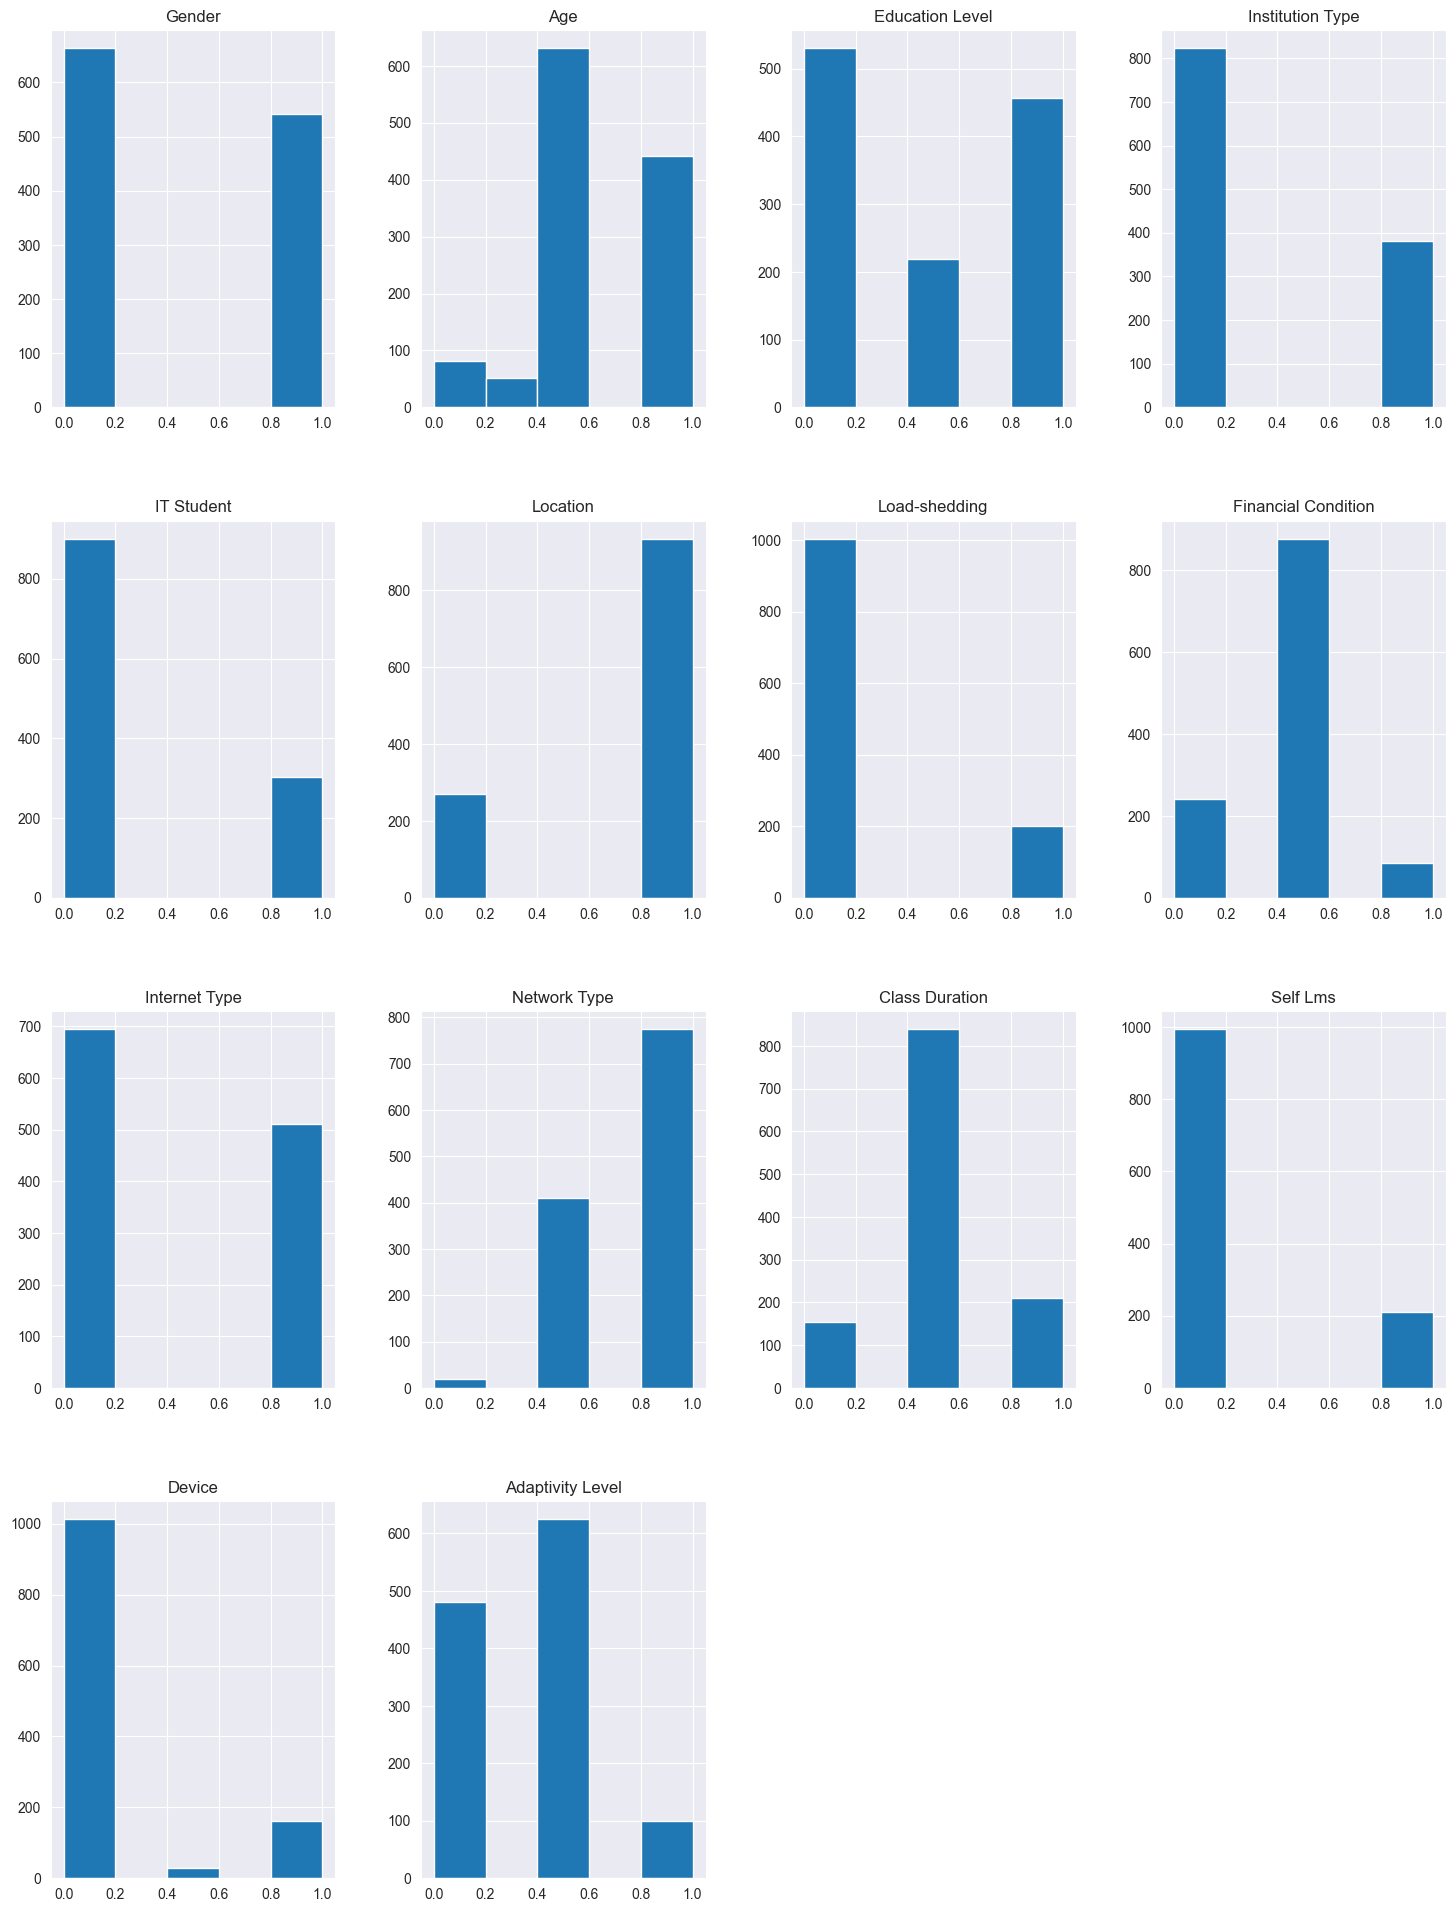

In [8]:
# СОЗДАНИЕ ГИСТОГРАММЫ ДАТАФРЕЙМА
# построение гистограммы с 5 столбцами для каждого столбца данных
df_normal.hist(bins=5, figsize=(18,24), grid=True)
plt.show()

### Тепловая карта

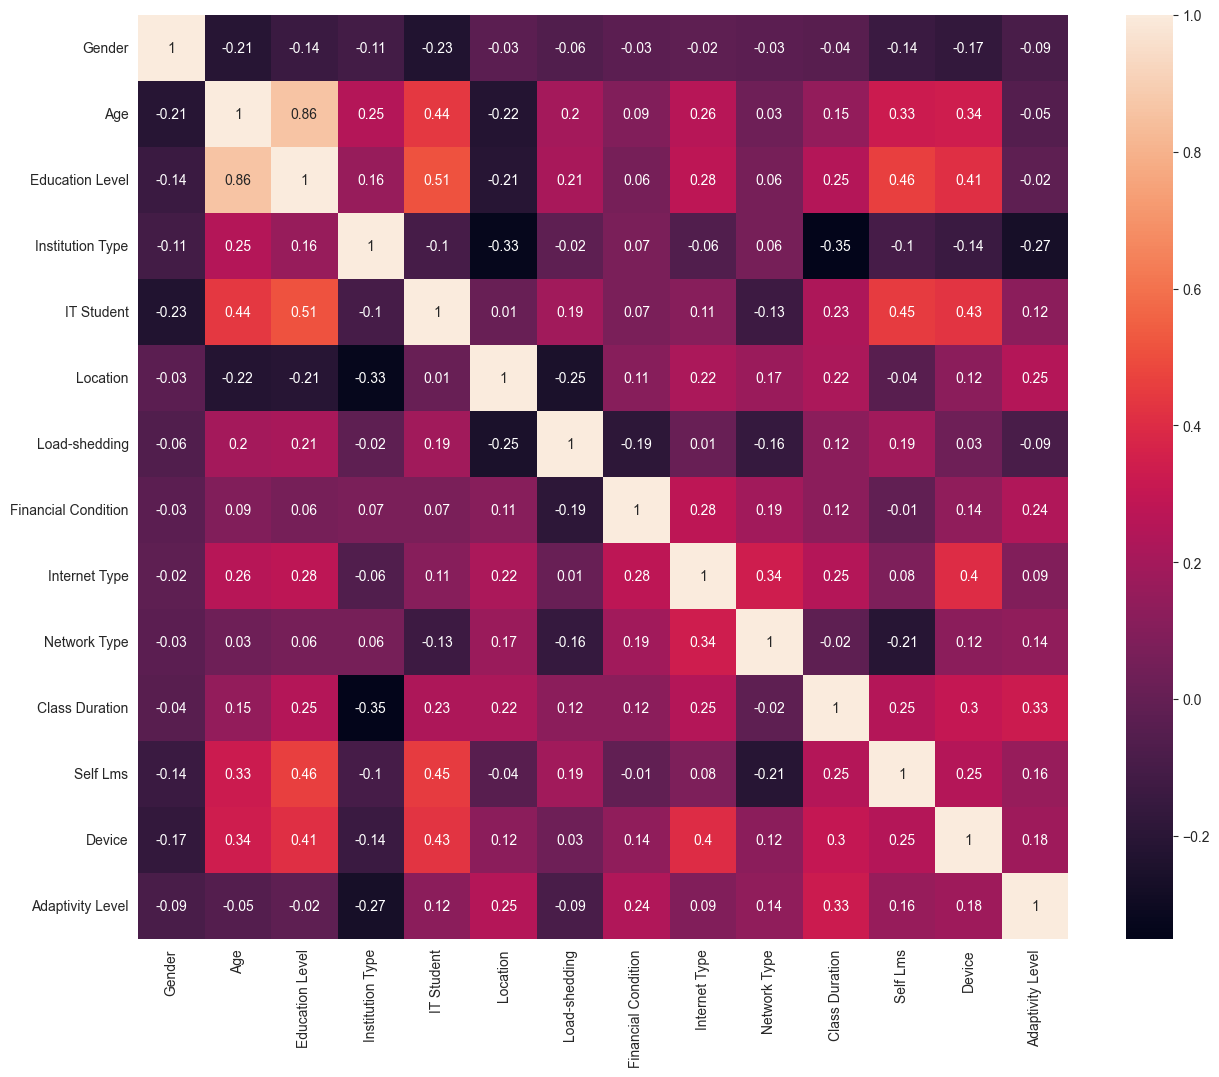

In [9]:
# СОЗДАНИЕ ТЕПЛОВОЙ КАРТЫ
# размер карты 15 на 12 дюймов
plt.figure(figsize=(15,12))
# df_normal.corr() -- вычисление матрицы корреляции
# round(decimals=2) -- округление значений корреляции до 2-ух знаков после запятой
# sns.heatmap() -- построение тепловой карты (положительная - светлые цвета; отрицательная - тёмные цвета)
# annot=True -- добавление числовой аннотации к каждой ячейке
sns.heatmap(df_normal.corr().round(decimals=2), annot=True)
# отображение построенной карты
plt.show()

## k-means

Рекомендованное кол-во кластеров для k-means:  8


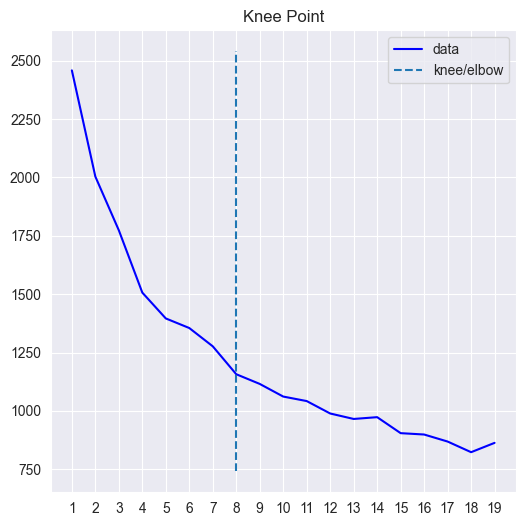

In [10]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_normal)
    # вычисление суммы квадратов расстояний выборок до их ближайшего центра кластера
    distortions.append(kmeanModel.inertia_)

# создание объекта для поиска "локтя" -- KneeLocator
# K -- массив значений К
# distortions -- соответствующие значения суммы квадратов расстояний
# curve = "convex" -- форма кривой
# direction="decreasing" -- направление изменения
kneeLocator = KneeLocator(K, distortions, curve = "convex", direction="decreasing")

# построение графика зависимости суммы квадратов расстояний от кол-ва кластеров и нахождение "локтя"
kneeLocator.plot_knee()
# вывод значения n_clusters
clusters_knee = kneeLocator.knee
print(f"Рекомендованное кол-во кластеров для k-means:  {clusters_knee}")

# установка меток по оси Ох
# np.arange(min(K), max(K)+1, 1.0) -- создание массива чисел от min до max значения из К, с шагом 1.0
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [11]:
# КЛАСТЕРИЗАЦИЯ С ПОМОЩЬЮ k-means
# создание объекта модели KMeans с указанным числом кластеров
# kmeanModel = KMeans(n_clusters=clusters_knee)
kmeanModel = KMeans(n_clusters=4)
# обучение модели и предсказание принадлежности точек к одному из кластеров
kmeanModel = kmeanModel.fit_predict(df_normal)
# подсчёт кол-ва точек в каждом кластере
Counter(kmeanModel)

Counter({np.int32(1): 376,
         np.int32(2): 327,
         np.int32(0): 254,
         np.int32(3): 248})

## DBSCAN

Рекомендованное значение eps для DBSCAN:  0.7071067811865476


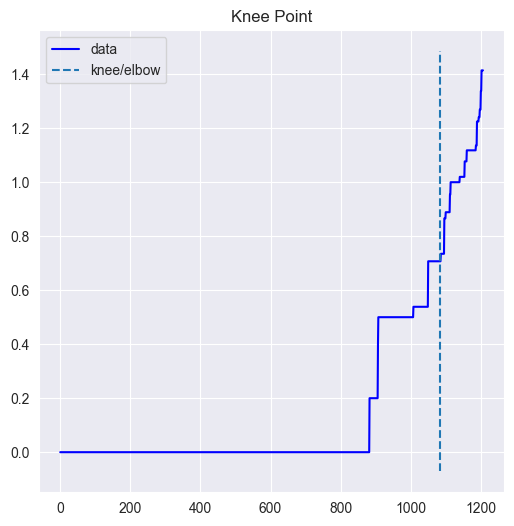

In [12]:
# создание модели NearestNeighbors, обученной на данных df_normal
neighbors = NearestNeighbors(n_neighbors=6).fit(df_normal) # рассматриваем 4 ближайших соседа для каждой точки
# получаем расстояния и индексы ближайших соседей для каждой точки в df_normal
neighborsDist, neighborsInd = neighbors.kneighbors(df_normal)
# сортировка массива расстояний по столбцам (по оси Ох)
sortNeighborDist = np.sort(neighborsDist, axis=0)

x = range(1, len(neighborsDist) + 1)
y = sortNeighborDist[:, 3]

kneeLocator = KneeLocator(x, y, curve="convex", S=25) # параметр S -- чувствительность к изломам кривой

# получение значения "локтя"
eps_knee = kneeLocator.knee_y
print(f"Рекомендованное значение eps для DBSCAN:  {eps_knee}")

# построение и вывод графика
kneeLocator.plot_knee()
plt.show()

In [13]:
# КЛАСТЕРИЗАЦИЯ С ПОМОЩЬЮ DBSCAN
# eps -- расстояние, при котором две точки считаются в одном кластере 
# min_samples -- min кол-во точек в заданной окрестности для того, чтобы точка считалась ядром кластера
# clusters = DBSCAN(eps=eps_knee, min_samples=25).fit(df_normal)
clusters = DBSCAN(eps=1.05, min_samples=25).fit(df_normal)
# подсчёт кол-ва точек в каждом кластере
Counter(clusters.labels_)

Counter({np.int64(0): 872, np.int64(-1): 307, np.int64(1): 26})

# Визуализация
## PCA (Метод главных компонент)

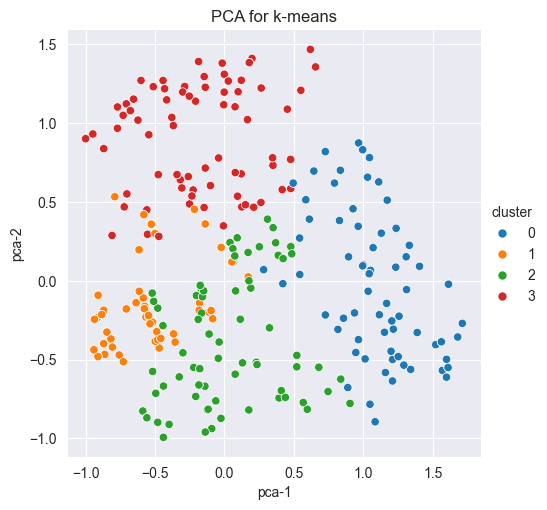

In [14]:
# ВИЗУАЛИЗАЦИЯ ДЛЯ k-means
subsetLen = len(df_normal)
subsetDf = df_normal[:subsetLen]

# снижаем размерность
PCAModel = PCA(n_components=2)
PCAData = PCAModel.fit_transform(subsetDf)

# создание нового датафрейма
PCADf = pd.DataFrame()
PCADf['pca-1'] = PCAData[:, 0]
PCADf['pca-2'] = PCAData[:, 1]

# создание столбца с прогнозами для каждой строки из kmeanModel
PCADf['cluster'] = kmeanModel[:subsetLen]
# конвертация столбца 'cluster' в тип 'category'
PCADf['cluster'] = PCADf['cluster'].astype('category')

# строим график в соответствии с разделением точек по кластерам
sns.relplot(x='pca-1', y='pca-2', hue='cluster', data=PCADf)
plt.title('PCA for k-means')
plt.show()

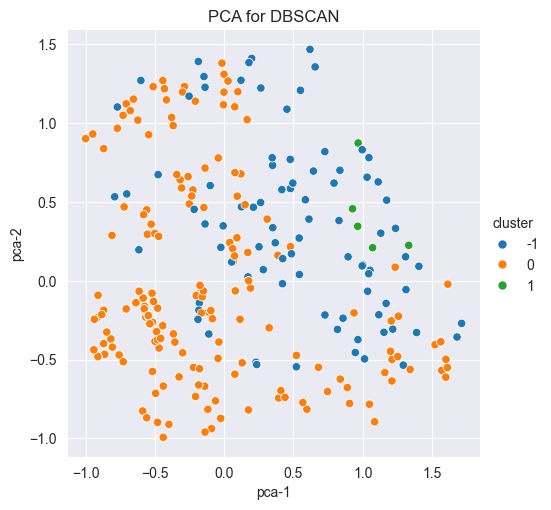

In [15]:
# ВИЗУАЛИЗАЦИЯ ДЛЯ DBSCAN
# создание столбца с прогнозами для каждой строки из clusters (получено для DBSCAN)
PCADf['cluster'] = clusters.labels_[:subsetLen]
# конвертация столбца 'cluster' в тип 'category'
PCADf['cluster'] = PCADf['cluster'].astype('category')

# строим график в соответствии с разделением точек по кластерам
sns.relplot(x='pca-1', y='pca-2', hue='cluster', data=PCADf)
plt.title('PCA for DBSCAN')
plt.show()

## t-SNE (Стохастическое вложение соседей с t-распределением)

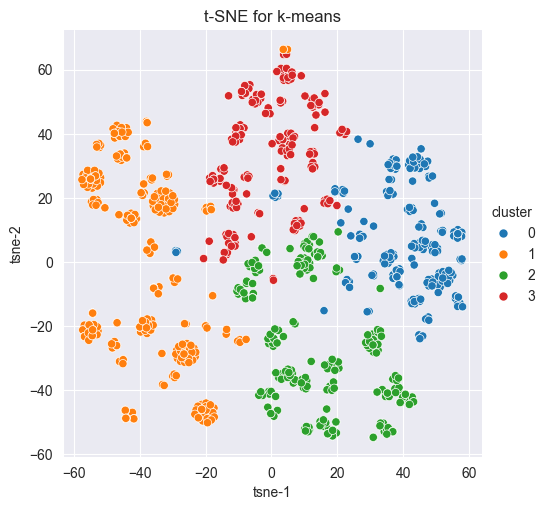

In [16]:
# ВИЗУАЛИЗАЦИЯ ДЛЯ k-means
subsetLen = len(df_normal)
subsetDf = df_normal[:subsetLen]

# снижаем размерность
tSNEModel = TSNE(n_components=2)
tSNEData = tSNEModel.fit_transform(subsetDf)

# создание нового датафрейма
tSNEDf = pd.DataFrame()
tSNEDf['tsne-1'] = tSNEData[:, 0]
tSNEDf['tsne-2'] = tSNEData[:, 1]

# создание столбца с прогнозами для каждой строки из kmeanModel
tSNEDf['cluster'] = kmeanModel[:subsetLen]
# конвертация столбца 'cluster' в тип 'category'
tSNEDf['cluster'] = tSNEDf['cluster'].astype('category')

# строим график в соответствии с разделением точек по кластерам
sns.relplot(x='tsne-1', y='tsne-2', hue='cluster', data=tSNEDf)
plt.title('t-SNE for k-means')
plt.show()

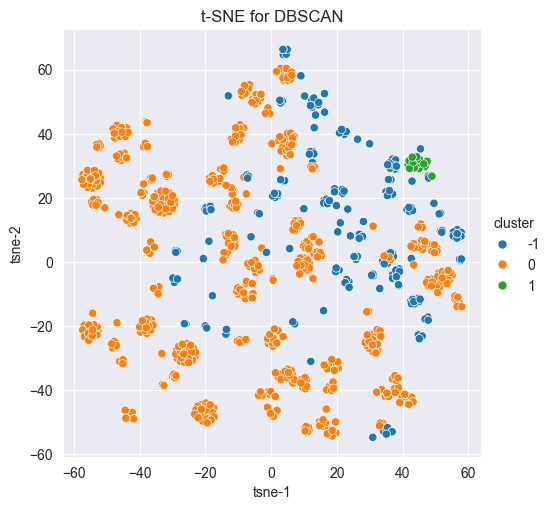

In [17]:
# ВИЗУАЛИЗАЦИЯ ДЛЯ DBSCAN
# создание столбца с прогнозами для каждой строки из clusters (получено для DBSCAN)
tSNEDf['cluster'] = clusters.labels_[:subsetLen]
# конвертация столбца 'cluster' в тип 'category'
tSNEDf['cluster'] = tSNEDf['cluster'].astype('category')

# строим график в соответствии с разделением точек по кластерам
sns.relplot(x='tsne-1', y='tsne-2', hue='cluster', data=tSNEDf)
plt.title('t-SNE for DBSCAN')
plt.show()